# Equation6.1:
$$
\begin{aligned}
\frac{\partial a}{\partial t}&= s(\frac{a^2}{(1+s_aa^2)(b+s_b)} + b_a) - r_aa + D_a\Delta a \\
\frac{\partial b}{\partial t}&= s(\frac{a^2}{(1+s_aa^2)} + b_a) - \frac{r_b}{c}b + D_b\Delta b \\
\frac{\partial c}{\partial t}&= r_c\sum_{i=1}^{n}a_i/{n} - r_cc \\
\end{aligned}
$$

Meinhardt, H. The Algorithmic Beauty of Sea Shells; Springer Science & Business Media: Berlin/Heidelberg Germany, 2009. Page 95.

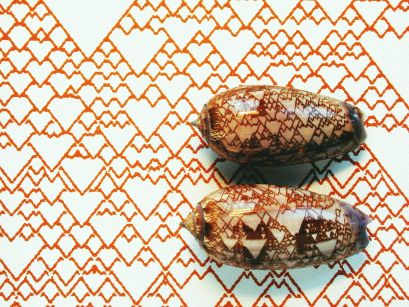

Click here for more details. http://oliva.porphyria.free.fr

Below we implement this model in iPython.

Created on Sat Mar 30 13:50:12 2019

In [1]:
# Clear all existing variables
for name in dir(): 
    if not name.startswith('_'): 
        del globals()[name]
on=1; off=0 
Periodic=on

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#parameter
#a
Da =0.015
ra =0.1
ba =0.1
Sa =0.25
#b
Db =0
rb =0.014
Sb =0.1
#c
rc =0.1

In [4]:
#grid
LX  =640#length of x
LY  =320#length of y
LT  =12#lengthe of time
dx  =1#width of a cell in pixel

In [ ]:
#initial value
a =np.zeros(LX+10)
b =np.zeros(LX+10)+0.1
z =np.zeros(LX+10)+ra*(0.96+0.08*random.random())
c =0.5
Ma=np.zeros((LY+10,LX+10))
Mb=np.zeros((LY+10,LX+10))
Mc=np.zeros((LY+10,LX+10))
ai=random.sample(range(1,LX+1),30)
a[ai] =1
DAC =1-ra-2*Da
DBC =1-rb-2*Db
DBCC =DBC
itot =0

In [ ]:
#simulation
for itot in range(int(LY)):
    for iprint in range(int(LT)):
        A1=a[0]
        B1=b[0]
        #a[LX+1]=a[LX]
        #b[LX+1]=b[LX]
        BSA=0
        for i in range(int(LX)):
            AF=a[i]
            BF=b[i]
            AQ=z[i]*AF*AF/(1+Sa*AF*AF)
            a[i]=AF*DAC+Da*(A1+a[i+1])+AQ/(Sb+BF)
            b[i]=BF*DBCC+Db*(B1+b[i+1])+AQ
            BSA=BSA+rc*AF
            A1=AF
            B1=BF
        c=c*(1-rc)+BSA/LX
        RBB=rb/c
        DBCC=1-2*Db-RBB
    Ma[itot,:] = a
    Mb[itot,:] = b
    Mc[itot,:] = c

In [ ]:
#plot a
plt.matshow(Ma, cmap='gray_r')
plt.colorbar()
plt.savefig('6.1.Branch formation by changing time constants via a hormone-like substance-a.png', dpi=LX)
#plot b
plt.matshow(Mb, cmap='gray_r')
plt.colorbar()
plt.savefig('6.1.Branch formation by changing time constants via a hormone-like substance-b.png', dpi=LX)
#plot c
plt.matshow(Mb, cmap='gray_r')
plt.colorbar()
plt.savefig('6.1.Branch formation by changing time constants via a hormone-like substance-c.png', dpi=LX)

© Kang, ECNU-China 2020